In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#!kaggle datasets list

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c scrabble-player-rating

 94% 35.0M/37.3M [00:00<00:00, 124MB/s] 
100% 37.3M/37.3M [00:00<00:00, 116MB/s]


In [ ]:
!mkdir data_scrabble

In [ ]:
!unzip /content/scrabble-player-rating.zip -d data_scrabble

Archive:  /content/scrabble-player-rating.zip
  inflating: data_scrabble/games.csv  
  inflating: data_scrabble/sample_submission.csv  
  inflating: data_scrabble/test.csv  
  inflating: data_scrabble/train.csv  
  inflating: data_scrabble/turns.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_games = pd.read_csv("/content/data_scrabble/games.csv")
df_games.head()

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722


In [ ]:
df_turns = pd.read_csv("/content/data_scrabble/turns.csv")
df_turns.head()

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


In [ ]:
total_turns = df_turns.groupby(['game_id' , 'nickname'])['turn_number'].count()
total_scores = df_turns.groupby(['game_id', 'nickname'])['score'].max()
max_points = df_turns.groupby(['game_id', 'nickname'])['points'].max()
min_points = df_turns.groupby(['game_id' , 'nickname'])['points'].min()
diff_points = max_points - min_points

turns = total_turns.reset_index()
turns.rename(columns = {'turn_number' : 'total_turns'} , inplace = True)
turns['max_points'] = max_points.reset_index()['points']
turns['min_points'] = min_points.reset_index()['points']
turns['diff_points'] = diff_points.reset_index()['points']
turns['total_score'] = total_scores.reset_index()['score']
turns['score_per_turn'] = turns['total_score']/turns['total_turns']

turns.head()

,game_id,nickname,total_turns,max_points,min_points,diff_points,total_score,score_per_turn
0,1,BetterBot,13,68,8,60,335,25.769231
1,1,stevy,14,98,2,96,429,30.642857
2,2,BetterBot,12,85,8,77,401,33.416667
3,2,Super,14,94,0,94,488,34.857143
4,3,BetterBot,13,76,0,76,318,24.461538


In [ ]:
df_train = pd.read_csv("/content/data_scrabble/train.csv")
df_test = pd.read_csv("/content/data_scrabble/test.csv")

df_final = pd.concat([df_train , df_test])
df_final.set_index('game_id'  , inplace = True)  
df_final = df_final.sort_index(axis = 0)

df_final.reset_index(inplace = True)

In [ ]:
df_final.head()

,game_id,nickname,score,rating
0,1,BetterBot,335,1637.0
1,1,stevy,429,1500.0
2,2,BetterBot,401,2000.0
3,2,Super,488,NaN
4,3,BetterBot,318,2071.0


In [ ]:
df_f = pd.merge(turns , df_games ,on = ['game_id'])
df_f.head()

,game_id,nickname,total_turns,max_points,min_points,diff_points,total_score,score_per_turn,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,13,68,8,60,335,25.769231,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,1,stevy,14,98,2,96,429,30.642857,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
2,2,BetterBot,12,85,8,77,401,33.416667,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
3,2,Super,14,94,0,94,488,34.857143,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
4,3,BetterBot,13,76,0,76,318,24.461538,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262


In [ ]:
df_scr = pd.merge(df_f ,df_final , on = ['game_id'  , 'nickname'] )
df_scr.head(6)

#df_test = df_scr[(df_scr['rating'].isna()) == 1]
df_scr = df_scr[(df_scr['rating'].isna()) == 0]

In [ ]:
df_scr[df_scr['nickname'] == 'stevy']['rating_mode'].unique()

array(['CASUAL'], dtype=object)

In [ ]:
sample = df_scr[df_scr['nickname'] == 'davidavid']

In [ ]:
sample['rating_mode'].unique()

array(['RATED'], dtype=object)

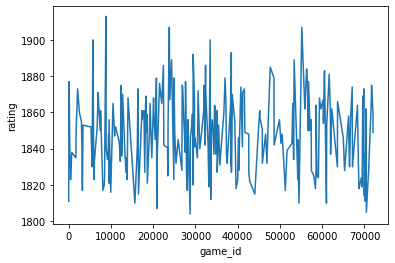

In [ ]:
sns.lineplot(data = sample , x = 'game_id' , y = 'rating')

In [ ]:
df_scr.groupby(['nickname' , 'rating_mode'])['game_id'].count().sort_values(ascending = False)

nickname     rating_mode
STEEBot      RATED          20873
BetterBot    RATED          18576
HastyBot     RATED          14627
             CASUAL          8986
BB-8         CASUAL          6576
                            ...  
SibSquad     RATED              1
Shobha7      RATED              1
Shariveen19  CASUAL             1
Sharfree     RATED              1
Scrabbeduto  CASUAL             1
Name: game_id, Length: 1152, dtype: int64

In [ ]:
rated_ser = df_scr.groupby(['nickname'])['rating_mode'].unique()

cas_name = []
rat_name = []
both_name = []

for name in rated_ser.index:
  if(np.all((rated_ser.loc[name] == np.array(['CASUAL'])))):
    cas_name.append(name)
  elif(np.all(rated_ser.loc[name] == np.array(['RATED']))):
    rat_name.append(name)
  else:
    both_name.append(name)

print(len(cas_name) , len(rat_name) , len(both_name))

201 709 121


In [ ]:
c = [] 
d = []

for name in cas_name:
  if (len(set(df_scr[df_scr['nickname'] == name]['rating'].values)) == 1):
    c.append(name)
  else:
    d.append(name)

print(c , d , sep = '\n' )

['1', '5k2smart', 'AASM16', 'ARLONG573', 'AWSOM_TS', 'Adnan', 'Afifahnidaulhaq', 'AhmedSalman', 'AidanHo', 'Aimanh', 'Alex1959', 'Alexaa', 'Amayzing123', 'AngieOsai', 'Avinesh', 'BB-8', 'Basonomia28', 'Bird2', 'BreadEmperoar', 'Brownie', 'ChenniePang', 'Chenyh', 'CobaltBlue', 'CodeTitan', 'Dani', 'DotdogBamburgur', 'Dustin', 'ERS', 'Elapsed', 'FEDERATIONofSOLARIA', 'Gath47', 'Gazzu', 'Gewgaw', 'HaDZ', 'Hadexzy', 'Haryuda', 'Hawraa', 'ISOLEX', 'Ieatchicken4', 'JustJoshing963', 'Kesavan', 'Kidikibudi', 'LAWERNHUNG', 'MARIESHAMARIAPPAN', 'MLCLLEH', 'Macktox', 'ManaalAsher', 'Mangala', 'MankDemes', 'Marc', 'MikaP', 'MimiH', 'MineC', 'Moses', 'Muendo', 'Mujtaba', 'Mzine', 'NOOB1000', 'NethukaMihisara3', 'Nickphone', 'NicoleChan', 'NishanyaGammanpila', 'NotSonal', 'Nuzul-Nasuha', 'PohJX', 'Puttapong', 'Raveesh', 'Rlowengrub', 'RomeoRat', 'SGP', 'SMJKJitSin', 'SMKA_Pahang', 'SMKMAJAKIR', 'SMKSIK_GROUP2', 'Saadkhan', 'Scaevola', 'Scal', 'Shanthoosh', 'SirFink', 'TT9000', 'Tehyuken', 'TheOneWho

In [ ]:
df_scr[df_scr['nickname'] == 'J-Oriola'].tail()

,game_id,nickname,total_turns,max_points,min_points,diff_points,total_score,score_per_turn,first,time_control_name,...,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,score,rating
83239,41620,J-Oriola,18,34,-24,58,282,15.666667,J-Oriola,rapid,...,0,2022-08-09 20:01:47,CSW21,600,0,CASUAL,1,627.317148,248,1500.0
89871,44936,J-Oriola,17,48,-48,96,251,14.764706,J-Oriola,rapid,...,0,2022-08-09 20:13:59,CSW21,600,0,CASUAL,1,665.441268,241,1500.0
98447,49224,J-Oriola,19,72,-72,144,350,18.421053,BetterBot,regular,...,0,2022-08-09 14:52:20,CSW21,1200,0,CASUAL,5,1494.058375,293,1860.0
144325,72163,J-Oriola,19,50,-14,64,345,18.157895,J-Oriola,regular,...,0,2022-08-09 15:17:33,CSW21,1200,0,CASUAL,5,1242.691088,335,1860.0
145405,72703,J-Oriola,20,77,-77,154,235,11.750000,BetterBot,rapid,...,0,2022-08-09 19:50:27,CSW21,600,0,CASUAL,1,665.512711,217,1500.0


In [ ]:
df_scr[df_scr['nickname'] == ""]

,game_id,nickname,total_turns,max_points,min_points,diff_points,total_score,score_per_turn,first,time_control_name,...,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,score,rating


In [ ]:
for name in c:
  print(df_scr[df_scr['nickname'] == name]['rating'].values[0])

In [ ]:
#df_test.head()

In [ ]:
#df_test.shape

In [ ]:
#name_len = len(df_test[df_test['rating_mode'] == "CASUAL"]['nickname'].values)

#np.intersect1d(df_test[df_test['rating_mode'] == "CASUAL"]['nickname'].values , np.array(c))

In [ ]:
#np.intersect1d(df_test['nickname'].values , df_scr['nickname'].values)

In [ ]:
#df_test[df_test['rating_mode'] == "CASUAL"]['nickname'].values

In [ ]:
df_cas = df_scr[df_scr['rating_mode'] == "CASUAL"]

df_cas.groupby(['lexicon' , 'time_control_name'])['rating'].min()

lexicon  time_control_name
CSW21    blitz                1318.0
         rapid                1118.0
         regular              1098.0
         ultrablitz           1500.0
ECWL     regular              1271.0
NSWL20   regular              1349.0
NWL20    blitz                1420.0
         rapid                1377.0
         regular              1130.0
         ultrablitz           1574.0
Name: rating, dtype: float64

In [ ]:
df_scr.head()

,game_id,nickname,total_turns,max_points,min_points,diff_points,total_score,score_per_turn,first,time_control_name,...,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,score,rating
0,1,BetterBot,13,68,8,60,335,25.769231,BetterBot,regular,...,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,335,1637.0
1,1,stevy,14,98,2,96,429,30.642857,BetterBot,regular,...,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,429,1500.0
2,2,BetterBot,12,85,8,77,401,33.416667,Super,regular,...,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418,401,2000.0
4,3,BetterBot,13,76,0,76,318,24.461538,BetterBot,regular,...,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262,318,2071.0
5,3,davidavid,14,103,13,90,440,31.428571,BetterBot,regular,...,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262,440,1811.0


In [ ]:
df_train.head()

,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473


In [ ]:
df_scrabble = pd.merge(df_f , df_train , on = ['game_id' , 'nickname'])
df_t = pd.merge(df_f , df_test , on = ['game_id' , 'nickname'])
df_scrabble.head()

,game_id,nickname,total_turns,max_points,min_points,diff_points,total_score,score_per_turn,first,time_control_name,...,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,score,rating
0,1,BetterBot,13,68,8,60,335,25.769231,BetterBot,regular,...,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,335,1637
1,1,stevy,14,98,2,96,429,30.642857,BetterBot,regular,...,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,429,1500
2,3,BetterBot,13,76,0,76,318,24.461538,BetterBot,regular,...,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262,318,2071
3,3,davidavid,14,103,13,90,440,31.428571,BetterBot,regular,...,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262,440,1811
4,4,BetterBot,15,74,8,66,478,31.866667,BetterBot,regular,...,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141,478,1936


In [ ]:
df_test.head()

,game_id,nickname,score,rating
0,2,Super,488,NaN
1,2,BetterBot,401,2000.0
2,7,STEEBot,377,2082.0
3,7,Priya1,379,NaN
4,11,STEEBot,334,1829.0


In [ ]:
bot_rating = []
bot_score = []
bot_indices = []

for i,name in enumerate(df_scrabble['nickname'].values) :
  if((name == "BetterBot") or (name == "HastyBot") or (name == "STEEBot")):
    bot_rating.append((df_scrabble.iloc[i])['rating'])
    bot_score.append(df_scrabble.iloc[i]['score'])
    bot_indices.append(i)
  else:
    continue

print(len(bot_rating) , len(bot_score))

50410 50410


In [ ]:
Bot_rating = []
Bot_score = []
Bot_indices = []

for i,name in enumerate(df_t['nickname'].values) :
  if((name == "BetterBot") or (name == "HastyBot") or (name == "STEEBot")):
    Bot_rating.append((df_t.iloc[i])['rating'])
    Bot_score.append(df_t.iloc[i]['score'])
    Bot_indices.append(i)
  else:
    continue

print(len(Bot_rating) , len(Bot_score))

22363 22363


In [ ]:
(df_scrabble['game_id'] == df_scrabble.iloc[1]['game_id']).values.sum()

2

In [ ]:
print(len(bot_indices))

50410


In [ ]:
df_test.groupby(['game_id'])['nickname'].count()

game_id
2        2
7        2
11       2
14       2
27       2
        ..
72760    2
72761    2
72762    2
72768    2
72769    2
Name: nickname, Length: 22363, dtype: int64

In [ ]:
bot_indices

In [ ]:
Train_df = df_scrabble.drop(index = bot_indices)
Train_df['Bot_Rating'] = bot_rating
Train_df['Diff_Score'] = Train_df['score'].values - np.array(bot_score)

Train_df.head()

,game_id,nickname,total_turns,max_points,min_points,diff_points,total_score,score_per_turn,first,time_control_name,...,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,score,rating,Bot_Rating,Diff_Score
1,1,stevy,14,98,2,96,429,30.642857,BetterBot,regular,...,NWL20,1200,0,CASUAL,1,674.844274,429,1500,1637,94
3,3,davidavid,14,103,13,90,440,31.428571,BetterBot,regular,...,CSW21,900,0,RATED,5,492.268262,440,1811,2071,122
5,4,Inandoutworker,14,26,0,26,119,8.500000,BetterBot,regular,...,CSW21,3600,0,CASUAL,1,350.861141,119,1473,1936,-359
7,5,stevy,16,51,0,51,325,20.312500,STEEBot,regular,...,NWL20,1200,0,CASUAL,1,642.688722,325,1500,1844,-102
8,6,HivinD,12,74,8,66,378,31.500000,HivinD,regular,...,CSW21,900,0,RATED,1,426.950541,378,2029,2143,-49


In [ ]:
Test_df = df_t.drop(index = Bot_indices)
Test_df['Bot_Rating'] = Bot_rating
Test_df['Diff_Score'] = Test_df['score'].values - np.array(Bot_score)

Test_df.head()

,game_id,nickname,total_turns,max_points,min_points,diff_points,total_score,score_per_turn,first,time_control_name,...,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,score,rating,Bot_Rating,Diff_Score
1,2,Super,14,94,0,94,488,34.857143,Super,regular,...,CSW21,3600,0,RATED,1,364.214418,488,NaN,2000.0,87
2,7,Priya1,13,68,0,68,379,29.153846,Priya1,regular,...,CSW21,1260,0,RATED,1,385.599607,379,NaN,2082.0,2
5,11,TileRunner,14,66,0,66,462,33.000000,TileRunner,regular,...,NWL20,1200,0,CASUAL,1,501.739156,462,NaN,1829.0,128
6,14,Anfield223,15,98,4,94,359,23.933333,STEEBot,regular,...,CSW21,900,0,RATED,1,293.253051,359,NaN,2136.0,-44
9,27,friesbasil,11,90,9,81,456,41.454545,friesbasil,regular,...,CSW21,1200,0,RATED,1,203.963230,456,NaN,2258.0,3


In [ ]:
Train_df['score_per_second'] = Train_df['score']/Train_df['game_duration_seconds']
Train_df['time_used'] = Train_df['game_duration_seconds']/Train_df['initial_time_seconds']

Train_df.head()

,game_id,nickname,total_turns,max_points,min_points,diff_points,total_score,score_per_turn,first,time_control_name,...,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,score,rating,Bot_Rating,Diff_Score,score_per_second,time_used
1,1,stevy,14,98,2,96,429,30.642857,BetterBot,regular,...,0,CASUAL,1,674.844274,429,1500,1637,94,0.635702,0.562370
3,3,davidavid,14,103,13,90,440,31.428571,BetterBot,regular,...,0,RATED,5,492.268262,440,1811,2071,122,0.893822,0.546965
5,4,Inandoutworker,14,26,0,26,119,8.500000,BetterBot,regular,...,0,CASUAL,1,350.861141,119,1473,1936,-359,0.339166,0.097461
7,5,stevy,16,51,0,51,325,20.312500,STEEBot,regular,...,0,CASUAL,1,642.688722,325,1500,1844,-102,0.505688,0.535574
8,6,HivinD,12,74,8,66,378,31.500000,HivinD,regular,...,0,RATED,1,426.950541,378,2029,2143,-49,0.885348,0.474389


In [ ]:
Test_df['score_per_second'] = Test_df['score']/Test_df['game_duration_seconds']
Test_df['time_used'] = Test_df['game_duration_seconds']/Test_df['initial_time_seconds']

Test_df.head()

,game_id,nickname,total_turns,max_points,min_points,diff_points,total_score,score_per_turn,first,time_control_name,...,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,score,rating,Bot_Rating,Diff_Score,score_per_second,time_used
1,2,Super,14,94,0,94,488,34.857143,Super,regular,...,0,RATED,1,364.214418,488,NaN,2000.0,87,1.339870,0.101171
2,7,Priya1,13,68,0,68,379,29.153846,Priya1,regular,...,0,RATED,1,385.599607,379,NaN,2082.0,2,0.982885,0.306031
5,11,TileRunner,14,66,0,66,462,33.000000,TileRunner,regular,...,0,CASUAL,1,501.739156,462,NaN,1829.0,128,0.920797,0.418116
6,14,Anfield223,15,98,4,94,359,23.933333,STEEBot,regular,...,0,RATED,1,293.253051,359,NaN,2136.0,-44,1.224199,0.325837
9,27,friesbasil,11,90,9,81,456,41.454545,friesbasil,regular,...,0,RATED,1,203.963230,456,NaN,2258.0,3,2.235697,0.169969


In [ ]:
id_ser = df_scrabble.groupby(['game_id'])['nickname'].unique()

for i , names in enumerate(id_ser.values):
  if(((names[0])[-3:] == "Bot") and ((names[1])[-3:] == "Bot")):
    print(names)
  else:
    continue;

['HastyBot' 'MasterBot']
['HastyBot' 'MasterBot']
['HastyBot' 'MasterBot']
['HastyBot' 'MasterBot']
['HastyBot' 'MasterBot']
['HastyBot' 'MasterBot']
['HastyBot' 'MasterBot']
['HastyBot' 'MasterBot']
['HastyBot' 'MasterBot']
['HastyBot' 'MasterBot']


In [ ]:
df = Train_df.drop(columns = ['game_id' , 'nickname' , 'first' , 'increment_seconds' ,'max_overtime_minutes' , 'score' , 'created_at' ,
                              'initial_time_seconds', 'game_end_reason' ])

In [ ]:
test = Test_df.drop(columns = ['game_id' , 'nickname' , 'first' , 'increment_seconds' ,'max_overtime_minutes' , 'score' , 'created_at' ,
                              'initial_time_seconds', 'game_end_reason' , 'rating' ])

In [ ]:
df.head()

,total_turns,max_points,min_points,diff_points,total_score,score_per_turn,time_control_name,winner,lexicon,rating_mode,game_duration_seconds,rating,Bot_Rating,Diff_Score,score_per_second,time_used
1,14,98,2,96,429,30.642857,regular,1,NWL20,CASUAL,674.844274,1500,1637,94,0.635702,0.562370
3,14,103,13,90,440,31.428571,regular,1,CSW21,RATED,492.268262,1811,2071,122,0.893822,0.546965
5,14,26,0,26,119,8.500000,regular,0,CSW21,CASUAL,350.861141,1473,1936,-359,0.339166,0.097461
7,16,51,0,51,325,20.312500,regular,0,NWL20,CASUAL,642.688722,1500,1844,-102,0.505688,0.535574
8,12,74,8,66,378,31.500000,regular,0,CSW21,RATED,426.950541,2029,2143,-49,0.885348,0.474389


In [ ]:
df = pd.get_dummies(df)
df.head()

,total_turns,max_points,min_points,diff_points,total_score,score_per_turn,winner,game_duration_seconds,rating,Bot_Rating,...,time_control_name_blitz,time_control_name_rapid,time_control_name_regular,time_control_name_ultrablitz,lexicon_CSW21,lexicon_ECWL,lexicon_NSWL20,lexicon_NWL20,rating_mode_CASUAL,rating_mode_RATED
1,14,98,2,96,429,30.642857,1,674.844274,1500,1637,...,0,0,1,0,0,0,0,1,1,0
3,14,103,13,90,440,31.428571,1,492.268262,1811,2071,...,0,0,1,0,1,0,0,0,0,1
5,14,26,0,26,119,8.500000,0,350.861141,1473,1936,...,0,0,1,0,1,0,0,0,1,0
7,16,51,0,51,325,20.312500,0,642.688722,1500,1844,...,0,0,1,0,0,0,0,1,1,0
8,12,74,8,66,378,31.500000,0,426.950541,2029,2143,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
test = pd.get_dummies(test)

one_hot = pd.get_dummies(test['winner'])

Test_data = test.join(one_hot)
Test_data.drop(columns = ['winner'] , inplace = True)

In [ ]:
one_hot = pd.get_dummies(df['winner'])

df_final = df.join(one_hot)
df_final.drop(columns = ['winner'] , inplace = True)

In [ ]:
df_final.head()

,total_turns,max_points,min_points,diff_points,total_score,score_per_turn,game_duration_seconds,rating,Bot_Rating,Diff_Score,...,time_control_name_ultrablitz,lexicon_CSW21,lexicon_ECWL,lexicon_NSWL20,lexicon_NWL20,rating_mode_CASUAL,rating_mode_RATED,-1,0,1
1,14,98,2,96,429,30.642857,674.844274,1500,1637,94,...,0,0,0,0,1,1,0,0,0,1
3,14,103,13,90,440,31.428571,492.268262,1811,2071,122,...,0,1,0,0,0,0,1,0,0,1
5,14,26,0,26,119,8.500000,350.861141,1473,1936,-359,...,0,1,0,0,0,1,0,0,1,0
7,16,51,0,51,325,20.312500,642.688722,1500,1844,-102,...,0,0,0,0,1,1,0,0,1,0
8,12,74,8,66,378,31.500000,426.950541,2029,2143,-49,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
Test_data['lexicon_NSWL20'] = np.zeros((len(Bot_score),) , dtype = 'int64')
Test_data.head()

,total_turns,max_points,min_points,diff_points,total_score,score_per_turn,game_duration_seconds,Bot_Rating,Diff_Score,score_per_second,...,time_control_name_ultrablitz,lexicon_CSW21,lexicon_ECWL,lexicon_NWL20,rating_mode_CASUAL,rating_mode_RATED,-1,0,1,lexicon_NSWL20
1,14,94,0,94,488,34.857143,364.214418,2000.0,87,1.339870,...,0,1,0,0,0,1,0,0,1,0
2,13,68,0,68,379,29.153846,385.599607,2082.0,2,0.982885,...,0,1,0,0,0,1,0,0,1,0
5,14,66,0,66,462,33.000000,501.739156,1829.0,128,0.920797,...,0,0,0,1,1,0,0,0,1,0
6,15,98,4,94,359,23.933333,293.253051,2136.0,-44,1.224199,...,0,1,0,0,0,1,0,1,0,0
9,11,90,9,81,456,41.454545,203.963230,2258.0,3,2.235697,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
corr_matrix = df_final.corr(method = 'pearson')

corr_matrix['rating'].sort_values(ascending = False)

rating                          1.000000
Bot_Rating                      0.673723
lexicon_CSW21                   0.606121
rating_mode_RATED               0.463930
score_per_turn                  0.401368
total_score                     0.336720
max_points                      0.234965
Diff_Score                      0.151700
game_duration_seconds           0.141911
diff_points                     0.137507
1                               0.104967
time_control_name_regular       0.059227
time_used                       0.053422
min_points                      0.047827
time_control_name_rapid         0.007486
-1                             -0.001492
lexicon_NSWL20                 -0.007605
time_control_name_ultrablitz   -0.051009
time_control_name_blitz        -0.077533
0                              -0.104552
score_per_second               -0.154673
total_turns                    -0.254070
lexicon_NWL20                  -0.297318
rating_mode_CASUAL             -0.463930
lexicon_ECWL    

In [ ]:
df_final.head()

,total_turns,max_points,min_points,diff_points,total_score,score_per_turn,game_duration_seconds,rating,Bot_Rating,Diff_Score,...,time_control_name_ultrablitz,lexicon_CSW21,lexicon_ECWL,lexicon_NSWL20,lexicon_NWL20,rating_mode_CASUAL,rating_mode_RATED,-1,0,1
1,14,98,2,96,429,30.642857,674.844274,1500,1637,94,...,0,0,0,0,1,1,0,0,0,1
3,14,103,13,90,440,31.428571,492.268262,1811,2071,122,...,0,1,0,0,0,0,1,0,0,1
5,14,26,0,26,119,8.500000,350.861141,1473,1936,-359,...,0,1,0,0,0,1,0,0,1,0
7,16,51,0,51,325,20.312500,642.688722,1500,1844,-102,...,0,0,0,0,1,1,0,0,1,0
8,12,74,8,66,378,31.500000,426.950541,2029,2143,-49,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

train , val_test = train_test_split(df_final , test_size = 0.4 , random_state = 0)
validation , test = train_test_split( val_test , test_size = 0.25 , random_state = 0)

In [ ]:
y_train = train['rating'].values
x_train = (train.drop(columns = ['rating'])).values

x_validation = (validation.drop(columns = ['rating'])).values
y_validation = validation['rating'].values

x_test = (test.drop(columns = ['rating'])).values
y_test = test['rating'].values

test1 = Test_data.values


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

std_sld = StandardScaler()
xt_scaled = (x_train)
yt_scaled =(y_train.reshape(-1,1))

xv_scaled = (x_validation)
yv_scaled = (y_validation.reshape(-1,1))

ytt_scaled = y_test.reshape(-1,1)
xtt_scaled = x_test

In [ ]:
lin_reg = LinearRegression()
model = lin_reg.fit(xt_scaled , yt_scaled)

yt_predict = lin_reg.predict(x_train)

In [ ]:
r_sq = model.score(xt_scaled , yt_scaled)
r_sq

0.6275580693755509

In [ ]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(x_train)

error = mean_squared_error(y_train.reshape(-1,1) , y_predict)
error = np.sqrt(error)

error

139.8479174036766

In [ ]:
yv_predict = lin_reg.predict(x_validation)

val_error = mean_squared_error(y_validation.reshape(-1,1) , yv_predict)
val_error = np.sqrt(val_error)

val_error

139.95157003136774

In [ ]:
def rmse(X,model , Y):
  Y_Predict = model.predict(X)
  a = mean_squared_error(Y , Y_Predict)
  err = np.sqrt(a)

  return err

#train_err = rmse(x_train , sv_reg , y_train)
#print(f"training error : {train_err} , training_mean : {np.mean(y_train)}")
#
#val_err = rmse(x_validation , sv_reg , y_validation)
#print(f"validation error : {val_error} , validation_mean : {np.mean(y_validation)}")

In [ ]:
from sklearn.tree import DecisionTreeRegressor as DTR

tree_reg = DTR(random_state = 0)
tree_reg.fit(xt_scaled , yt_scaled)


DecisionTreeRegressor(random_state=0)

In [ ]:
train_err = rmse(x_train , tree_reg , y_train)
print(f"training error : {train_err} , training_mean : {np.mean(y_train)}")

val_err = rmse(x_validation , tree_reg , y_validation)
print(f"validation error : {val_error} , validation_mean : {np.mean(y_validation)}")

training error : 0.0 , training_mean : 1790.8426568802486
validation error : 139.95157003136774 , validation_mean : 1788.5535938636515


In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR

rnd_reg = RFR(random_state = 42)
rnd_model = rnd_reg.fit(xt_scaled , yt_scaled)

train_error = rmse(x_train , rnd_reg , y_train)
print(f"training error : {train_error} , training mean : {np.mean(y_train)}")

val_error = rmse(x_validation , rnd_reg , y_validation)
print(f"validation erro : {val_error} , validation mean : {np.mean(y_validation)}")

<ipython-input-65-4d7a8400f044>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_model = rnd_reg.fit(xt_scaled , yt_scaled)


training error : 44.09949674732192 , training mean : 1790.8426568802486
validation erro : 116.50525743001569 , validation mean : 1788.5535938636515


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RFR()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xt_scaled , yt_scaled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:

base_model = RFR(n_estimators = 10, random_state = 42)
base_model.fit(xt_scaled, yt_scaled)
base_score = rmse(x_validation , base_model , y_validation)
base_score

In [ ]:
best_Random = rf_random.best_estimator_
rmse(x_validation ,best_Random , y_validation)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

In [ ]:
#from sklearn.ensemble import RandomForestRegressor as RFR
import xgboost as xgb

xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

xgb_model.fit(xt_scaled,yt_scaled)

[14:14:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, learning_rate=0.07, min_child_weight=1.5,
             n_estimators=10000, reg_alpha=0.75, reg_lambda=0.45, seed=42,
             subsample=0.6)

In [ ]:
train_err = rmse(x_train , xgb_model , y_train)
print(f"training error : {train_err} , training_mean : {np.mean(y_train)}")

val_err = rmse(x_validation , xgb_model , y_validation)
print(f"validation error : {val_error} , validation_mean : {np.mean(y_validation)}")

training error : 77.78541071076762 , training_mean : 1790.8426568802486
validation error : 116.50525743001569 , validation_mean : 1788.5535938636515


In [ ]:
r_sq = xgb_model.score(xt_scaled , yt_scaled)
r_sq

0.8847760230164755

In [ ]:
# TEST ERRORS

for model in [lin_reg  , tree_reg  , xgb_model , rnd_reg]:
  print(f"Test Error : {rmse(x_test , model , ytt_scaled)}")

Test Error : 139.2480514506329
Test Error : 163.854998167645
Test Error : 127.0395843576753
Test Error : 117.1505372902039


In [ ]:
test_rating = np.ceil(rnd_reg.predict(test1))
test_rating

game_id = Test_df['game_id'].values
game_id

array([    2,     7,    11, ..., 72762, 72768, 72769])

In [ ]:
len(game_id)

In [ ]:
submission = pd.DataFrame({'game_id' : game_id , 'rating' : test_rating})
submission.set_index('game_id' , inplace = True)

submission.head()

,rating
game_id,
2,1793.0
7,1837.0
11,1724.0
14,1855.0
27,1913.0


In [ ]:
submission.to_csv('submission_4.csv')

In [ ]:
Test_data.head()

,total_turns,max_points,min_points,diff_points,total_score,score_per_turn,game_duration_seconds,rating,Bot_Rating,Diff_Score,...,time_control_name_regular,time_control_name_ultrablitz,lexicon_CSW21,lexicon_ECWL,lexicon_NWL20,rating_mode_CASUAL,rating_mode_RATED,-1,0,1
1,14,94,0,94,488,34.857143,364.214418,NaN,2000.0,87,...,1,0,1,0,0,0,1,0,0,1
2,13,68,0,68,379,29.153846,385.599607,NaN,2082.0,2,...,1,0,1,0,0,0,1,0,0,1
5,14,66,0,66,462,33.000000,501.739156,NaN,1829.0,128,...,1,0,0,0,1,1,0,0,0,1
6,15,98,4,94,359,23.933333,293.253051,NaN,2136.0,-44,...,1,0,1,0,0,0,1,0,1,0
9,11,90,9,81,456,41.454545,203.963230,NaN,2258.0,3,...,1,0,1,0,0,0,1,0,0,1


In [ ]:
Train_df.head()

,game_id,nickname,total_turns,max_points,min_points,diff_points,total_score,score_per_turn,first,time_control_name,...,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,score,rating,Bot_Rating,Diff_Score,score_per_second,time_used
1,1,stevy,14,98,2,96,429,30.642857,BetterBot,regular,...,0,CASUAL,1,674.844274,429,1500,1637,94,0.635702,0.562370
3,3,davidavid,14,103,13,90,440,31.428571,BetterBot,regular,...,0,RATED,5,492.268262,440,1811,2071,122,0.893822,0.546965
5,4,Inandoutworker,14,26,0,26,119,8.500000,BetterBot,regular,...,0,CASUAL,1,350.861141,119,1473,1936,-359,0.339166,0.097461
7,5,stevy,16,51,0,51,325,20.312500,STEEBot,regular,...,0,CASUAL,1,642.688722,325,1500,1844,-102,0.505688,0.535574
8,6,HivinD,12,74,8,66,378,31.500000,HivinD,regular,...,0,RATED,1,426.950541,378,2029,2143,-49,0.885348,0.474389
